# Alpha-angle classification

### Contents
* [1. Data preparation](#1.-Data-preparation)
* [2. 2-class classification](#2.-2-class-classification)
    * [2.1 Experiments](#2.1-Experiments)
    * [2.2 Result](#2.2-Result)
* [3. 3-class classification](#3.-3-class-classification)
    * [3.1 Experiments](#3.1-Experiments)
    * [3.2 Result](#3.2-Result)
* [4. 3-class classification (divided 0-class)](#4.-3-class-classification-(divided-0-class))
    * [4.1 Experiments](#4.1-Experiments)
    * [4.2 Result](#4.2-Result)
* [5. 4-class classification](#5.-4-class-classification)
    * [5.1 Experiments](#5.1-Experiments)
    * [5.2 Result](#5.2-Result)
* [6. Overall result](#6.-Overall-result)


# 1. Data-preparation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import numpy as np
import pandas as pd

from data import Data
from dataset import Dataset
from clusterizer import Clusterizer
from trainer import Trainer

In [2]:
data = Data()

Files reading...
File: training_30


100%|██████████| 834867/834867 [01:02<00:00, 13296.60it/s]


File: training_50


  0%|          | 12/21741 [00:00<03:16, 110.73it/s]

Targets calculating...


100%|██████████| 21741/21741 [04:06<00:00, 88.28it/s] 


Data size: 21741


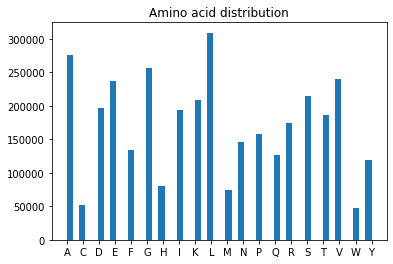

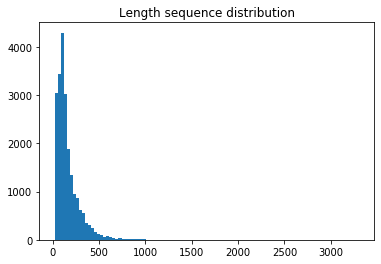

In [3]:
print('Data size:', len(data.seqs))

plt.hist(sorted([a for aa in data.seqs for a in aa]), bins=50);
plt.title('Amino acid distribution')
plt.show()

plt.hist([len(aa) for aa in data.seqs], bins=100);
plt.title('Length sequence distribution')
plt.show()

In [4]:
dataset = Dataset(data, 220, len_subseq=32)

100%|██████████| 21741/21741 [00:11<00:00, 1959.35it/s]


Train dataset size with subsequence length of 32: 39780


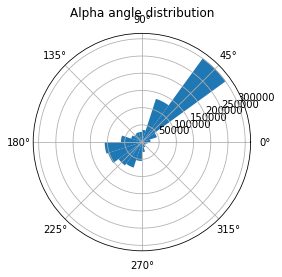

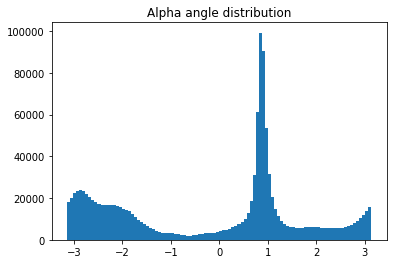

In [5]:
train_dataset = dataset.train_data_features

print('Train dataset size with subsequence length of 32:', len(train_dataset[0]))

train_alphas = np.array([a for aa in train_dataset[2] for a in aa])

plt.subplot(111, polar=True).hist(train_alphas, bins=20);
plt.title('Alpha angle distribution')
plt.show()

plt.hist(train_alphas, bins=100);
plt.title('Alpha angle distribution')
plt.show()

# 2. 2-class classification

In [6]:
clusterizer_2 = Clusterizer(dataset, n_clusters=2)

Class 0: 595789 elements
Class 1: 637391 elements


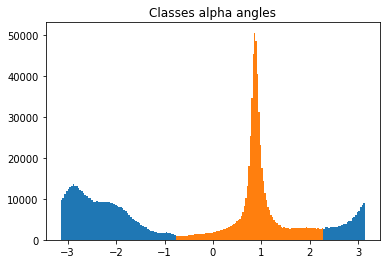

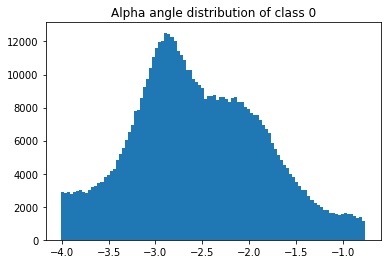

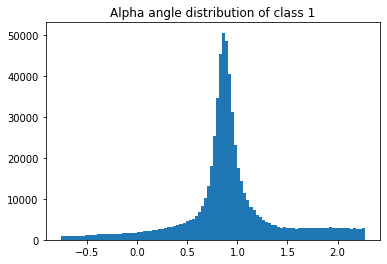

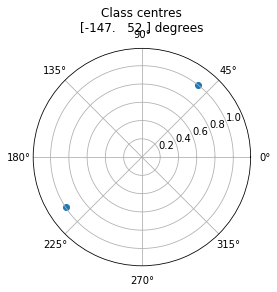

In [213]:
print('Class 0: %d elements' % len(clusterizer_2.angle_class[0]))
print('Class 1: %d elements' % len(clusterizer_2.angle_class[1]))


plt.hist(clusterizer_2.angle_class[0], bins=180);
plt.hist(clusterizer_2.angle_class[1], bins=100);
plt.title('Classes alpha angles')
plt.show()
    
plt.hist(np.append(clusterizer_2.angle_class[0][clusterizer_2.angle_class[0] < 0],
                   clusterizer_2.angle_class[0][clusterizer_2.angle_class[0] > 0] - 2 * np.pi), bins=100);
plt.title('Alpha angle distribution of class 0')
plt.show()

plt.hist(clusterizer_2.angle_class[1], bins=100);
plt.title('Alpha angle distribution of class 1')
plt.show()

plt.subplot(111, polar=True)
plt.scatter([np.arctan2(clusterizer_2.centers[:,1], clusterizer_2.centers[:,0])], [1, 1])
plt.title('Class centres\n{} degrees'.format(np.round(np.degrees(np.arctan2(clusterizer_2.centers[:,1], clusterizer_2.centers[:,0])))))
plt.show()

## 2.1 Experiments

In [9]:
from models.Conv1d import Conv1d
from models.Conv1d_BiLSTM import Conv1d_BiLSTM
from models.Conv1d_BiLSTM_Conv2d import Conv1d_BiLSTM_Conv2d
from models.Conv1d_Conv2d import Conv1d_Conv2d
from models.BiLSTM import BiLSTM
from models.BiLSTM_Conv2d import BiLSTM_Conv2d
from models.Conv2d import Conv2d
from models.UConv1d import UConv1d
from models.UConv1d_BiLSTM import UConv1d_BiLSTM
from models.UConv1d_BiLSTM_Conv2d import UConv1d_BiLSTM_Conv2d


models = ['Conv1d', 'Conv1d_BiLSTM', 'Conv1d_BiLSTM_Conv2d', 'Conv1d_Conv2d', 'BiLSTM',
          'BiLSTM_Conv2d', 'Conv2d', 'UConv1d', 'UConv1d_BiLSTM', 'UConv1d_BiLSTM_Conv2d']

trainers_2class = {}

### Model Conv1d

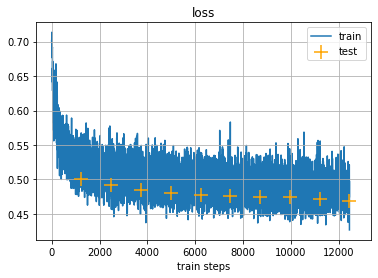

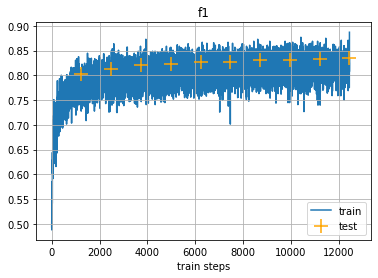

Epoch: 10, val loss: 0.4691169340502132, val f1: 0.8357517482517484


In [10]:
model = Conv1d(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['Conv1d'] = trainer

### Model Conv1d_BiLSTM

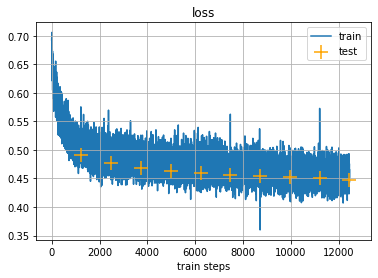

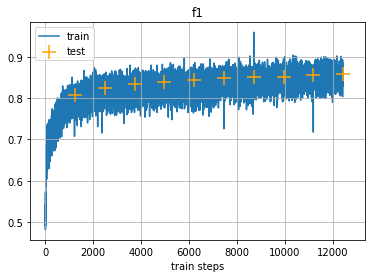

Epoch: 10, val loss: 0.4473329097032547, val f1: 0.8584215683510039


In [12]:
model = Conv1d_BiLSTM(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['Conv1d_BiLSTM'] = trainer

### Model Conv1d_BiLSTM_Conv2d

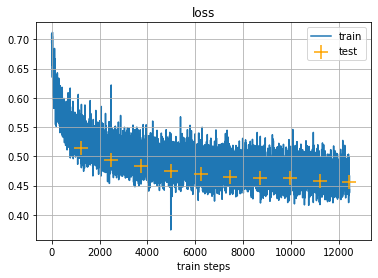

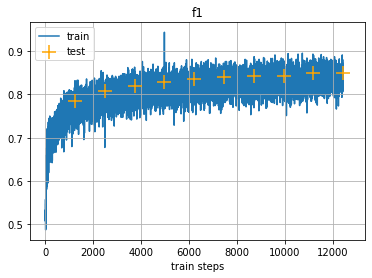

Epoch: 10, val loss: 0.4554924733259461, val f1: 0.8502361549740581


In [13]:
model = Conv1d_BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['Conv1d_BiLSTM_Conv2d'] = trainer

### Model Conv1d_Conv2d

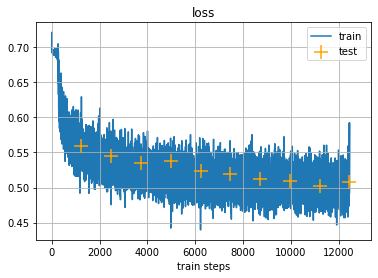

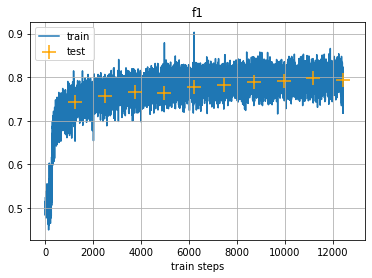

Epoch: 10, val loss: 0.5076737195253372, val f1: 0.7945730177080983


In [14]:
model = Conv1d_Conv2d(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['Conv1d_Conv2d'] = trainer

### Model BiLSTM

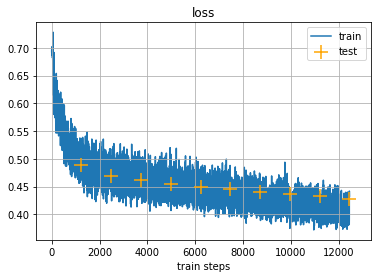

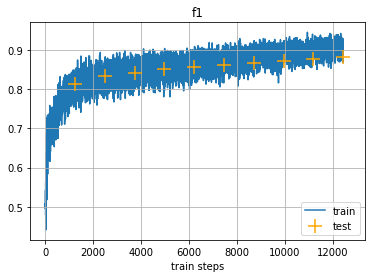

Epoch: 10, val loss: 0.427890421314673, val f1: 0.8819133487480263


In [15]:
model = BiLSTM(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['BiLSTM'] = trainer

### Model BiLSTM_Conv2d

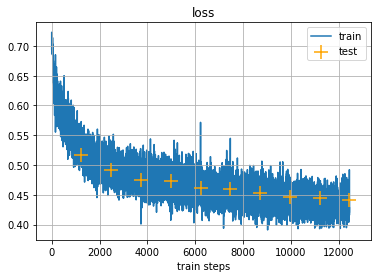

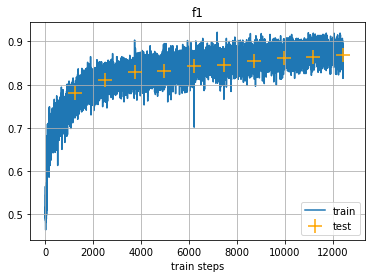

Epoch: 10, val loss: 0.44066698795015163, val f1: 0.8686054872546808


In [18]:
model = BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['BiLSTM_Conv2d'] = trainer

### Model Conv2d

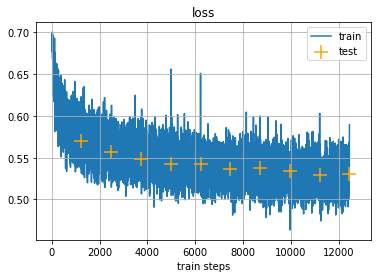

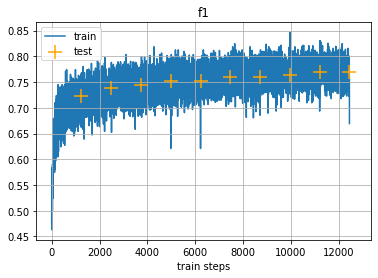

Epoch: 10, val loss: 0.530320625684478, val f1: 0.7687605741033162


In [19]:
model = Conv2d(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['Conv2d'] = trainer

### Model UConv1d

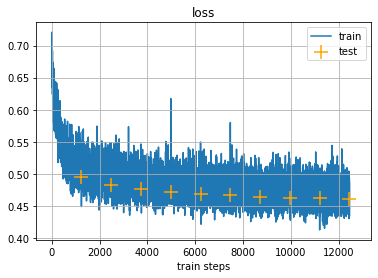

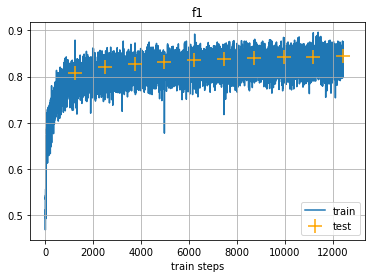

Epoch: 10, val loss: 0.46046269888227637, val f1: 0.8444517679900744


In [20]:
model = UConv1d(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['UConv1d'] = trainer

### Model UConv1d_BiLSTM

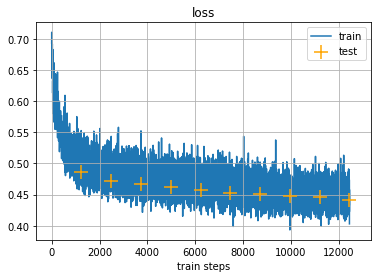

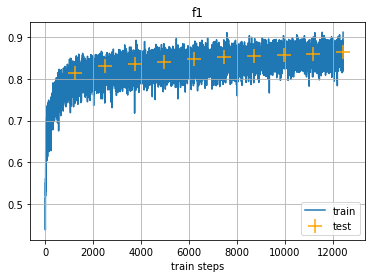

Epoch: 10, val loss: 0.4420139400796457, val f1: 0.8646271571170765


In [21]:
model = UConv1d_BiLSTM(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['UConv1d_BiLSTM'] = trainer

### Model UConv1d_BiLSTM_Conv2d

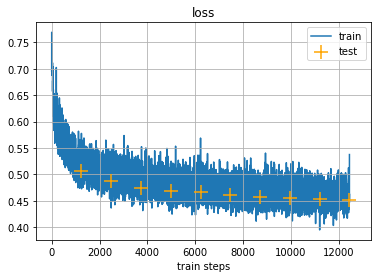

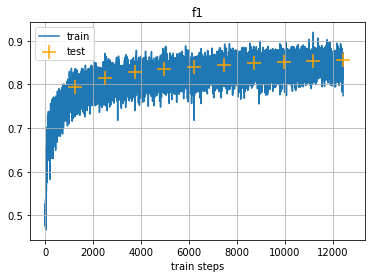

Epoch: 10, val loss: 0.4510665649717504, val f1: 0.855934186780961


In [22]:
model = UConv1d_BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=2)

trainer = Trainer(model, dataset, clusterizer_2)
trainer.train(n_epochs=10)

trainers_2class['UConv1d_BiLSTM_Conv2d'] = trainer

## 2.2 Result

In [446]:
from sklearn.metrics import f1_score

def compute_scores(trainers, binary=True):
    scores = []
    for m in models:
        if binary:
            scores.append(f1_score(trainers[m].targs, torch.argmax(trainers[m].preds, dim=-1)))
        else:
            scores.append(f1_score(trainers[m].targs, torch.argmax(trainers[m].preds, dim=-1), average='micro'))
    result = pd.DataFrame(data=scores, index=models, columns=['F1 score'])
    result.index.name = 'Model'
    return result


def draw_losses(trainers):
    plt.figure(figsize=(12, 8))
    plt.title('Loss')

    for m, t in trainers.items():
        points = np.array(t.test_loss_log)
        plt.plot(points[:, 0], points[:, 1], label=m)

    plt.xlabel('Train steps')
    plt.ylabel('Cross entropy loss')
    plt.legend(loc='best')
    plt.show()


def draw_scores(trainers):
    plt.figure(figsize=(12, 8))
    plt.title('Score')

    for m, t in trainers.items():
        points = np.array(t.test_f1_log)
        plt.plot(points[:, 0], points[:, 1], label=m)

    plt.xlabel('Train steps')
    plt.ylabel('F1 score')
    plt.legend(loc='best')
    plt.show()

,F1 score
Model,
BiLSTM,0.881808
BiLSTM_Conv2d,0.868541
UConv1d_BiLSTM,0.864026
UConv1d_BiLSTM_Conv2d,0.856585
Conv1d_BiLSTM,0.856094
Conv1d_BiLSTM_Conv2d,0.850337
UConv1d,0.842637
Conv1d,0.833162
Conv1d_Conv2d,0.798300


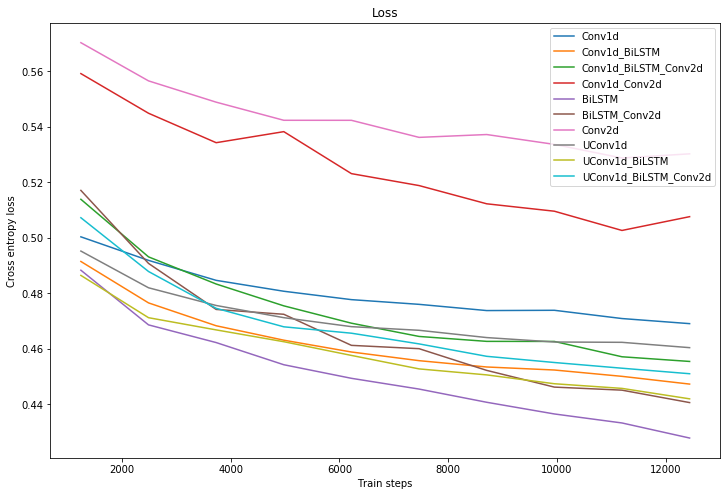

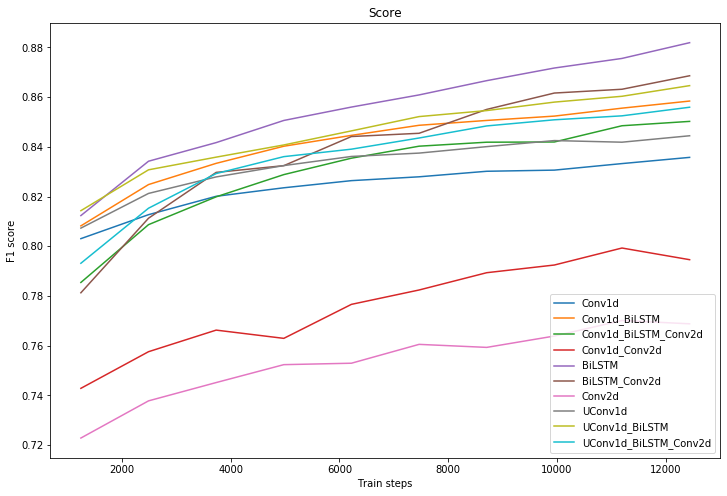

In [447]:
result_class2 = compute_scores(trainers_2class)
display(result_class2.sort_values(by='F1 score', ascending=False))

draw_losses(trainers_2class)
draw_scores(trainers_2class)

# 3. 3-class classification

In [75]:
clusterizer_3 = Clusterizer(dataset, n_clusters=3)

Class 0: 352428 elements
Class 1: 605202 elements
Class 2: 275550 elements


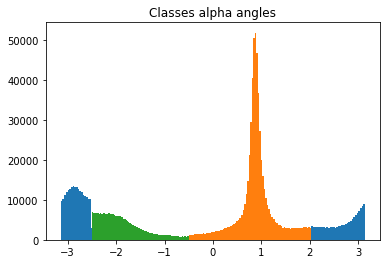

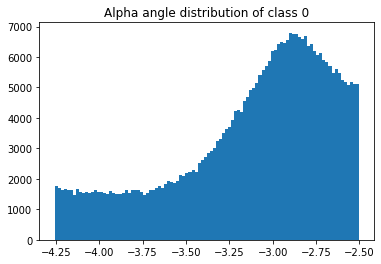

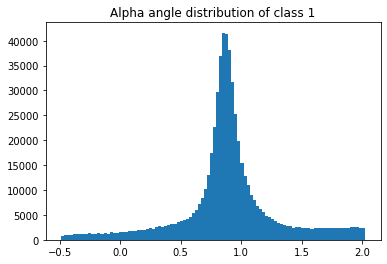

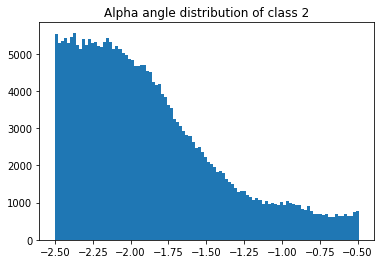

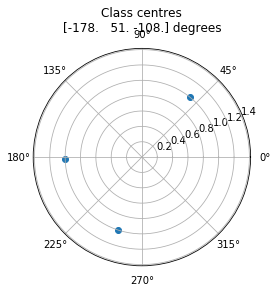

In [214]:
print('Class 0: %d elements' % len(clusterizer_3.angle_class[0]))
print('Class 1: %d elements' % len(clusterizer_3.angle_class[1]))
print('Class 2: %d elements' % len(clusterizer_3.angle_class[2]))


plt.hist(clusterizer_3.angle_class[0], bins=180);
plt.hist(clusterizer_3.angle_class[1], bins=80);
plt.hist(clusterizer_3.angle_class[2], bins=80);
plt.title('Classes alpha angles')
plt.show()
    
plt.hist(np.append(clusterizer_3.angle_class[0][clusterizer_3.angle_class[0] < 0],
                   clusterizer_3.angle_class[0][clusterizer_3.angle_class[0] > 0] - 2 * np.pi), bins=100);
plt.title('Alpha angle distribution of class 0')
plt.show()

plt.hist(clusterizer_3.angle_class[1], bins=100);
plt.title('Alpha angle distribution of class 1')
plt.show()

plt.hist(clusterizer_3.angle_class[2], bins=100);
plt.title('Alpha angle distribution of class 2')
plt.show()

plt.subplot(111, polar=True)
plt.scatter([np.arctan2(clusterizer_3.centers[:,1], clusterizer_3.centers[:,0])], [1, 1, 1])
plt.title('Class centres\n{} degrees'.format(np.round(np.degrees(np.arctan2(clusterizer_3.centers[:,1], clusterizer_3.centers[:,0])))))
plt.show()

## 3.1 Experiments

In [82]:
trainers_3class = {}

### Model Conv1d

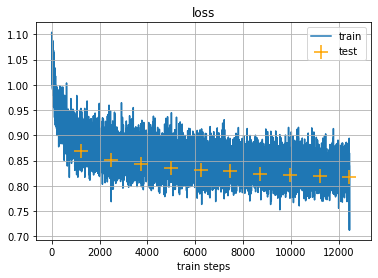

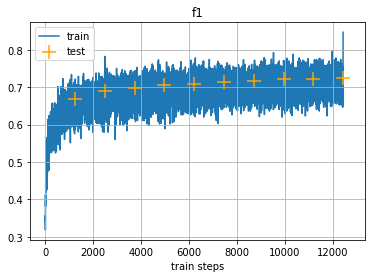

Epoch: 10, val loss: 0.8177626812999899, val f1: 0.724790985224453


In [85]:
model = Conv1d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['Conv1d'] = trainer

### Model Conv1d_BiLSTM

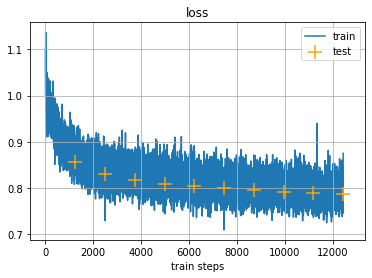

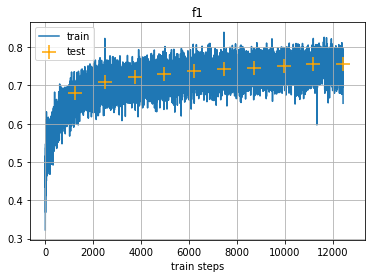

Epoch: 10, val loss: 0.7866598814725876, val f1: 0.7565076556508009


In [86]:
model = Conv1d_BiLSTM(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['Conv1d_BiLSTM'] = trainer

### Model Conv1d_BiLSTM_Conv2d

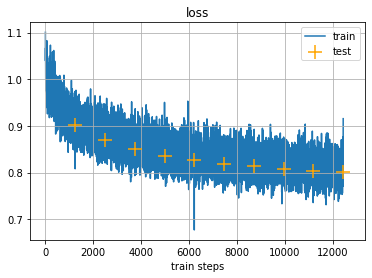

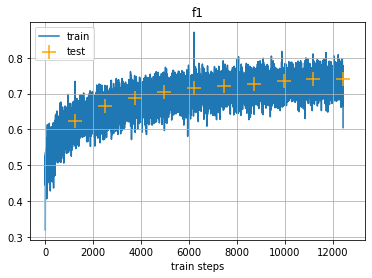

Epoch: 10, val loss: 0.8019948238676244, val f1: 0.7407716275659822


In [87]:
model = Conv1d_BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['Conv1d_BiLSTM_Conv2d'] = trainer

### Model Conv1d_Conv2d

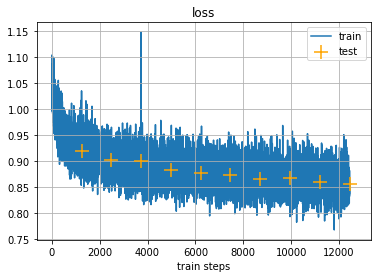

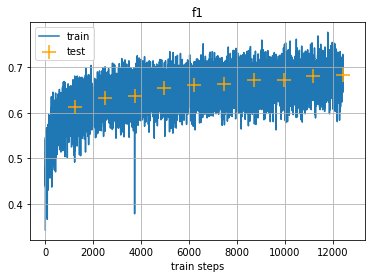

Epoch: 10, val loss: 0.8555401571772315, val f1: 0.6829774560117302


In [88]:
model = Conv1d_Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['Conv1d_Conv2d'] = trainer

### Model BiLSTM

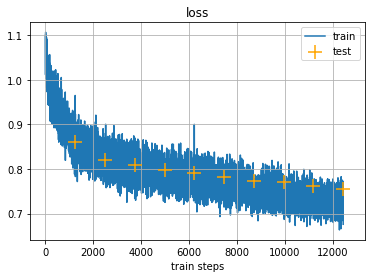

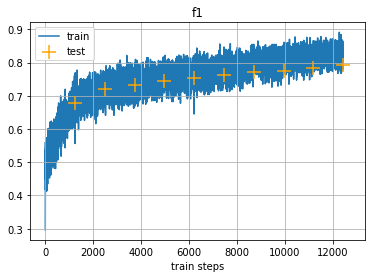

Epoch: 10, val loss: 0.7553791243921627, val f1: 0.7924430408301377


In [89]:
model = BiLSTM(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['BiLSTM'] = trainer

### Model BiLSTM_Conv2d

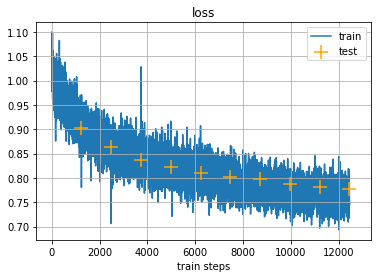

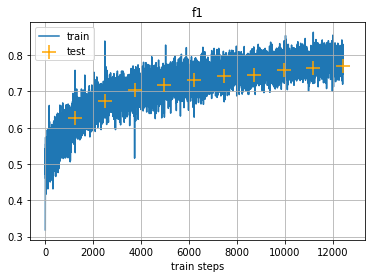

Epoch: 10, val loss: 0.7771040829745206, val f1: 0.7687151054590572


In [90]:
model = BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['BiLSTM_Conv2d'] = trainer

### Model Conv2d

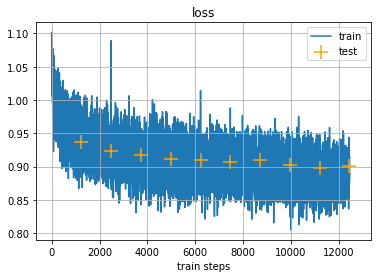

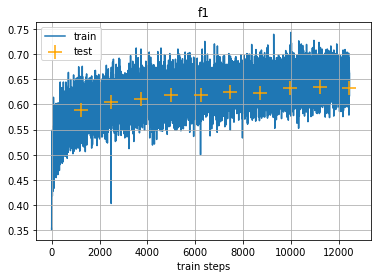

Epoch: 10, val loss: 0.9007312579588457, val f1: 0.6321272981051206


In [91]:
model = Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['Conv2d'] = trainer

### Model UConv1d

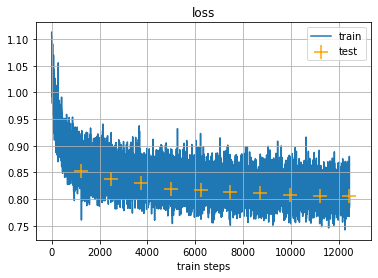

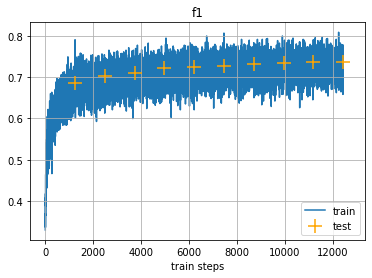

Epoch: 10, val loss: 0.8051113207231868, val f1: 0.7369889183397248


In [92]:
model = UConv1d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['UConv1d'] = trainer

### Model UConv1d_BiLSTM

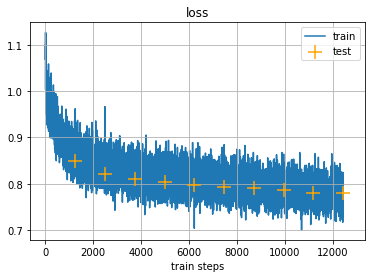

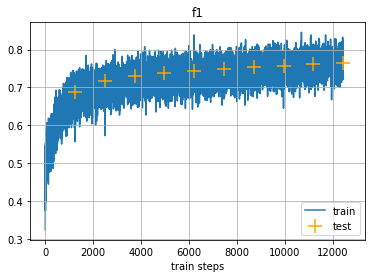

Epoch: 10, val loss: 0.7793835975907065, val f1: 0.7648626071509137


In [93]:
model = UConv1d_BiLSTM(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['UConv1d_BiLSTM'] = trainer

### Model UConv1d_BiLSTM_Conv2d

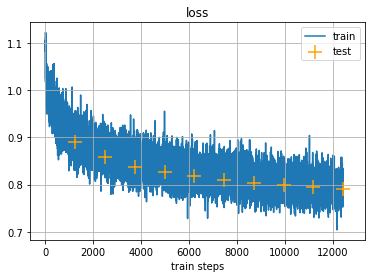

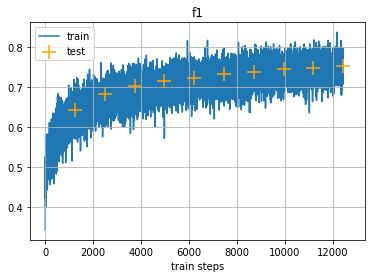

Epoch: 10, val loss: 0.7911837117238478, val f1: 0.7530608504398828


In [94]:
model = UConv1d_BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3)
trainer.train(n_epochs=10)

trainers_3class['UConv1d_BiLSTM_Conv2d'] = trainer

## 3.2 Result

,F1 score
Model,
BiLSTM,0.792452
BiLSTM_Conv2d,0.768680
UConv1d_BiLSTM,0.764858
Conv1d_BiLSTM,0.756413
UConv1d_BiLSTM_Conv2d,0.753091
Conv1d_BiLSTM_Conv2d,0.740856
UConv1d,0.737231
Conv1d,0.724899
Conv1d_Conv2d,0.682992


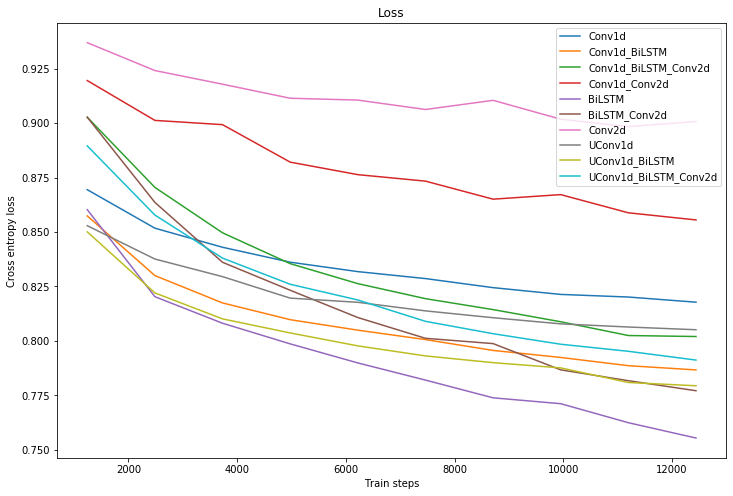

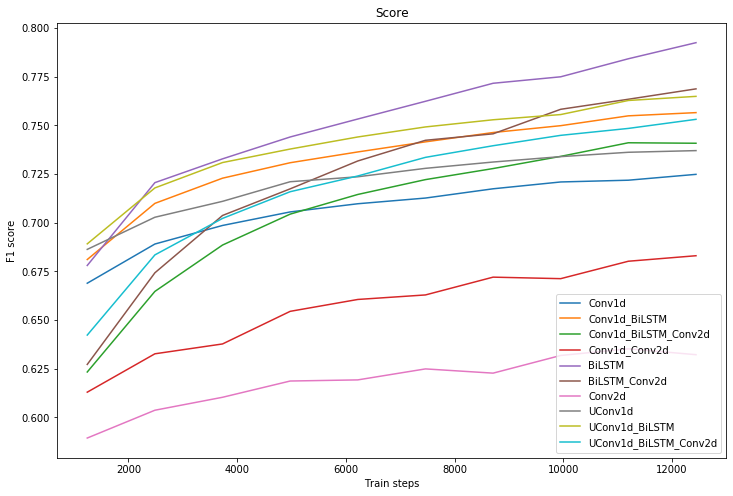

In [448]:
result_class3 = compute_scores(trainers_3class, binary=False)
display(result_class3.sort_values(by='F1 score', ascending=False))

draw_losses(trainers_3class)
draw_scores(trainers_3class)

# 4. 3-class classification (divided 0-class)

In [387]:
clusterizer_3_divided0 = Clusterizer(dataset, n_clusters=2, divideClass0=True)

Class 0: 337847 elements
Class 1: 257874 elements
Class 2: 637459 elements


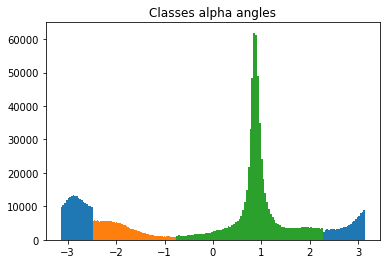

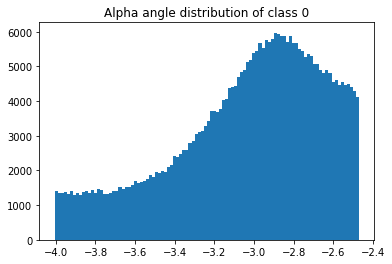

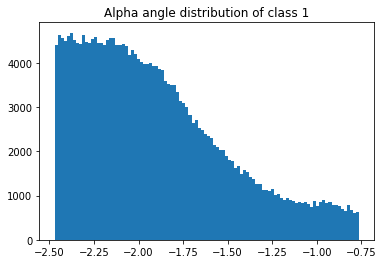

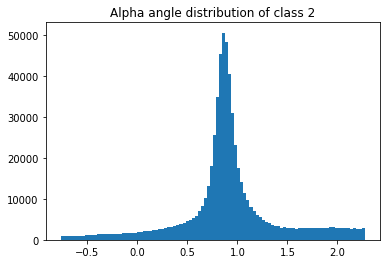

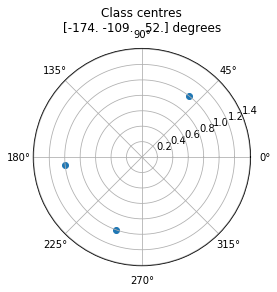

In [388]:
print('Class 0: %d elements' % len(clusterizer_3_divided0.angle_class[0]))
print('Class 1: %d elements' % len(clusterizer_3_divided0.angle_class[1]))
print('Class 2: %d elements' % len(clusterizer_3_divided0.angle_class[2]))


plt.hist(clusterizer_3_divided0.angle_class[0], bins=180);
plt.hist(clusterizer_3_divided0.angle_class[1], bins=80);
plt.hist(clusterizer_3_divided0.angle_class[2], bins=80);
plt.title('Classes alpha angles')
plt.show()
    
plt.hist(np.append(clusterizer_3_divided0.angle_class[0][clusterizer_3_divided0.angle_class[0] < 0],
                   clusterizer_3_divided0.angle_class[0][clusterizer_3_divided0.angle_class[0] > 0] - 2 * np.pi), bins=100);
plt.title('Alpha angle distribution of class 0')
plt.show()

plt.hist(clusterizer_3_divided0.angle_class[1], bins=100);
plt.title('Alpha angle distribution of class 1')
plt.show()

plt.hist(clusterizer_3_divided0.angle_class[2], bins=100);
plt.title('Alpha angle distribution of class 2')
plt.show()

plt.subplot(111, polar=True)
plt.scatter([np.arctan2(clusterizer_3_divided0.centers[:,1], clusterizer_3_divided0.centers[:,0])], [1, 1, 1])
plt.title('Class centres\n{} degrees'.format(np.round(np.degrees(np.arctan2(clusterizer_3_divided0.centers[:,1],
                                                                            clusterizer_3_divided0.centers[:,0])))))
plt.show()

## 4.1 Experiments

In [390]:
trainers_3class_divided0 = {}

### Model Conv1d

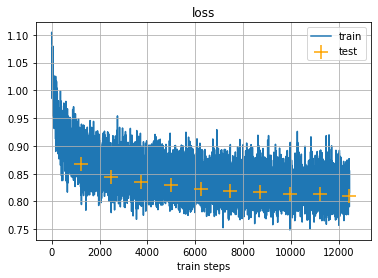

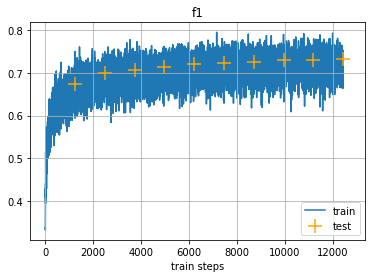

Epoch: 10, val loss: 0.8105148979208686, val f1: 0.7327338991653508


In [391]:
model = Conv1d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['Conv1d'] = trainer

### Model Conv1d_BiLSTM

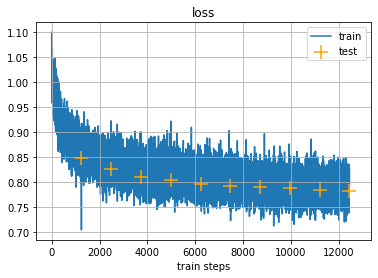

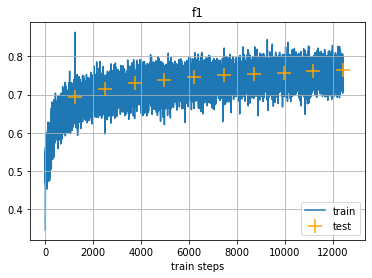

Epoch: 10, val loss: 0.7813921489498832, val f1: 0.7630280002255809


In [392]:
model = Conv1d_BiLSTM(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['Conv1d_BiLSTM'] = trainer

### Model Conv1d_BiLSTM_Conv2d

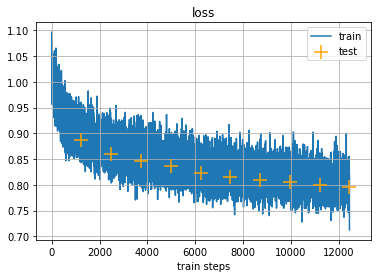

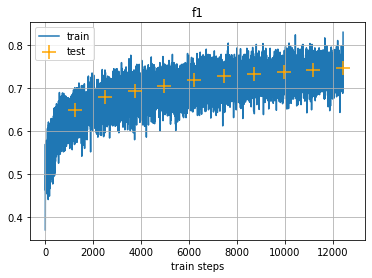

Epoch: 10, val loss: 0.7965985720807855, val f1: 0.7475186104218362


In [393]:
model = Conv1d_BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['Conv1d_BiLSTM_Conv2d'] = trainer

### Model Conv1d_Conv2d

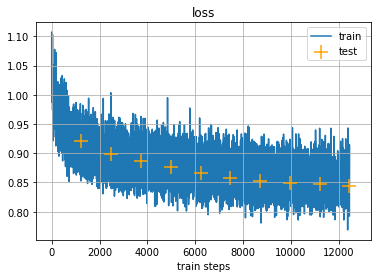

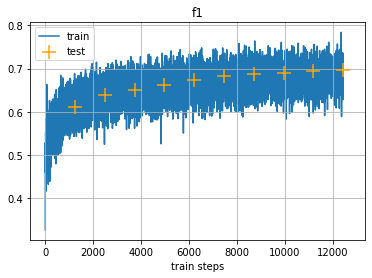

Epoch: 10, val loss: 0.8437606085430492, val f1: 0.6963371306113242


In [394]:
model = Conv1d_Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['Conv1d_Conv2d'] = trainer

### Model BiLSTM

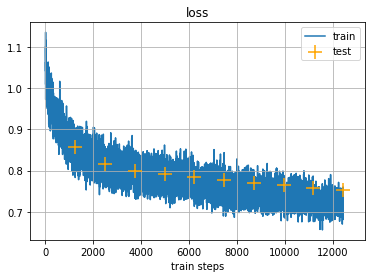

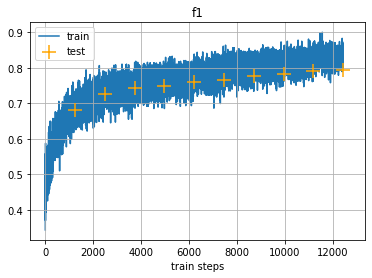

Epoch: 10, val loss: 0.7530285504731264, val f1: 0.7945395330475975


In [410]:
model = BiLSTM(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['BiLSTM'] = trainer

### Model BiLSTM_Conv2d

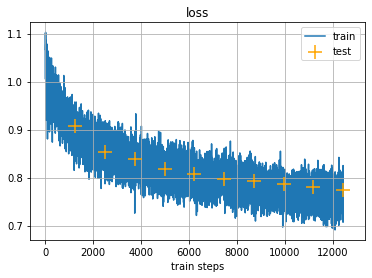

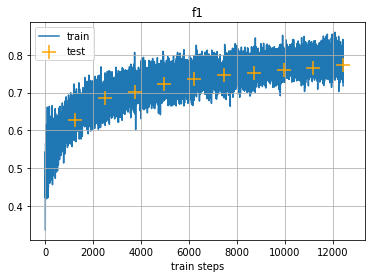

Epoch: 10, val loss: 0.7734872224656019, val f1: 0.7728975157906609


In [398]:
model = BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['BiLSTM_Conv2d'] = trainer

### Model Conv2d

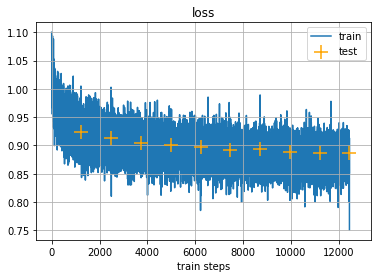

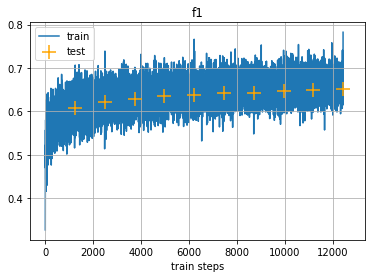

Epoch: 10, val loss: 0.8858170121908188, val f1: 0.6525476539589442


In [400]:
model = Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['Conv2d'] = trainer

### Model UConv1d

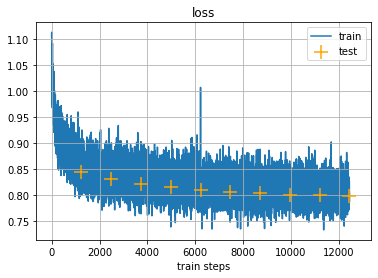

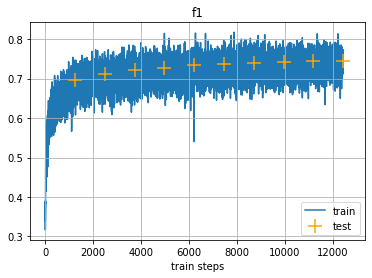

Epoch: 10, val loss: 0.7979101533239538, val f1: 0.7455141129032259


In [401]:
model = UConv1d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['UConv1d'] = trainer

### Model UConv1d_BiLSTM

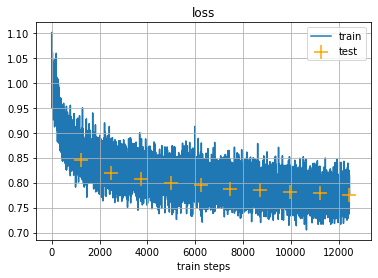

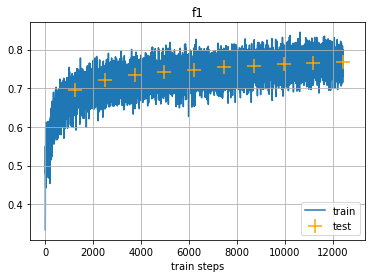

Epoch: 10, val loss: 0.7758860772306269, val f1: 0.7686541281299345


In [402]:
model = UConv1d_BiLSTM(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['UConv1d_BiLSTM'] = trainer

### Model UConv1d_BiLSTM_Conv2d

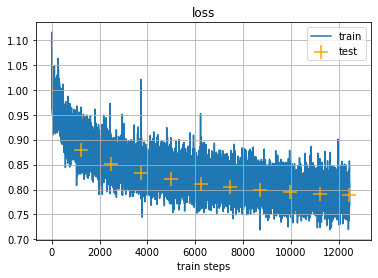

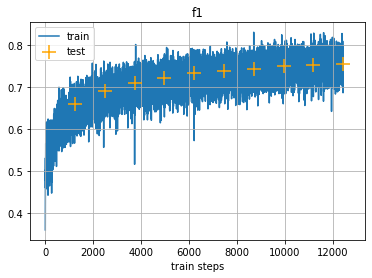

Epoch: 10, val loss: 0.7891331138935956, val f1: 0.7550219941348975


In [403]:
model = UConv1d_BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=3)

trainer = Trainer(model, dataset, clusterizer_3_divided0)
trainer.train(n_epochs=10)

trainers_3class_divided0['UConv1d_BiLSTM_Conv2d'] = trainer

## 4.2 Result

,F1 score
Model,
BiLSTM,0.794474
BiLSTM_Conv2d,0.772834
UConv1d_BiLSTM,0.768653
Conv1d_BiLSTM,0.763038
UConv1d_BiLSTM_Conv2d,0.755145
Conv1d_BiLSTM_Conv2d,0.747440
UConv1d,0.745524
Conv1d,0.732857
Conv1d_Conv2d,0.696408


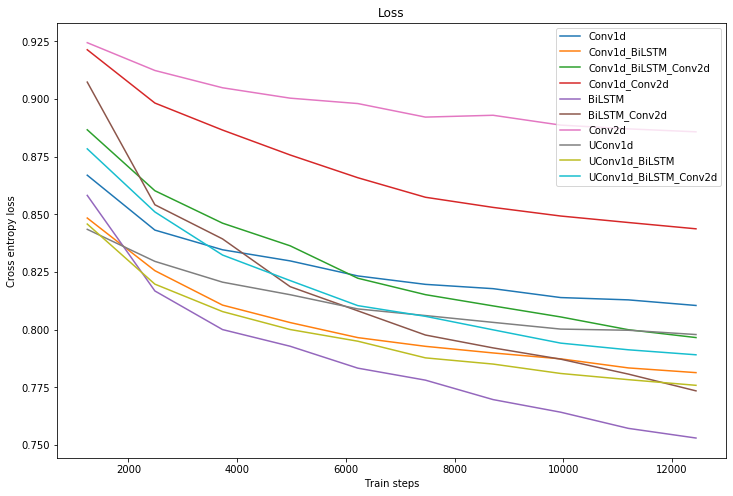

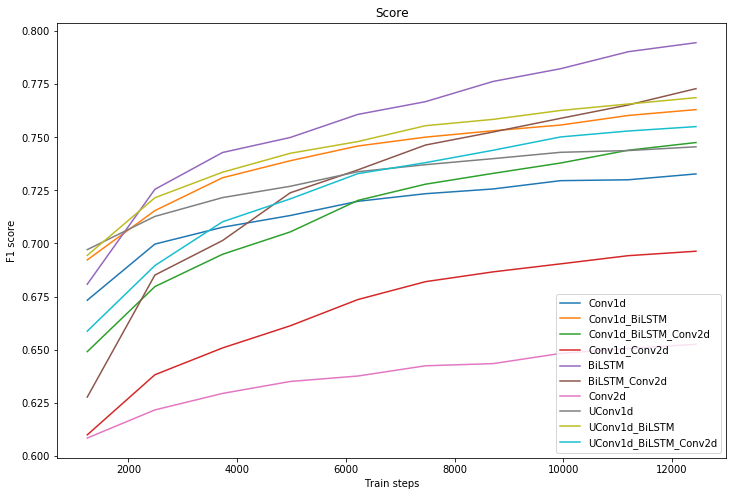

In [449]:
result_class3_divided0 = compute_scores(trainers_3class_divided0, binary=False)
display(result_class3_divided0.sort_values(by='F1 score', ascending=False))

draw_losses(trainers_3class_divided0)
draw_scores(trainers_3class_divided0)

# 5. 4-class classification

In [422]:
clusterizer_4 = Clusterizer(dataset, n_clusters=4)

Class 0: 331196 elements
Class 1: 550862 elements
Class 2: 227030 elements
Class 3: 124092 elements


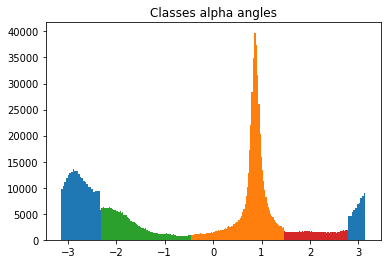

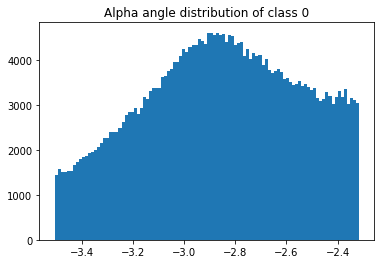

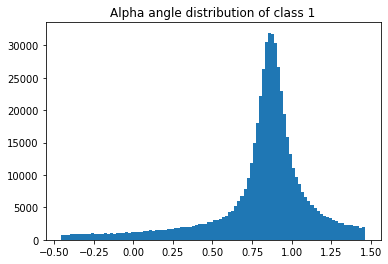

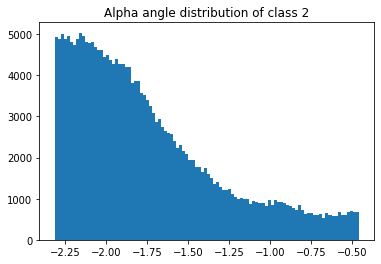

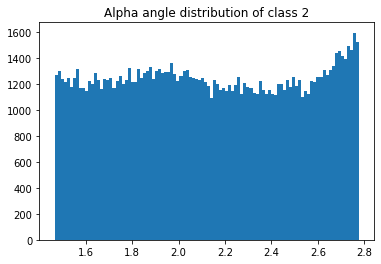

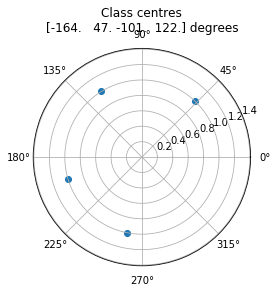

In [424]:
print('Class 0: %d elements' % len(clusterizer_4.angle_class[0]))
print('Class 1: %d elements' % len(clusterizer_4.angle_class[1]))
print('Class 2: %d elements' % len(clusterizer_4.angle_class[2]))
print('Class 3: %d elements' % len(clusterizer_4.angle_class[3]))


plt.hist(clusterizer_4.angle_class[0], bins=180);
plt.hist(clusterizer_4.angle_class[1], bins=80);
plt.hist(clusterizer_4.angle_class[2], bins=80);
plt.hist(clusterizer_4.angle_class[3], bins=80);
plt.title('Classes alpha angles')
plt.show()
    
plt.hist(np.append(clusterizer_4.angle_class[0][clusterizer_4.angle_class[0] < 0],
                   clusterizer_4.angle_class[0][clusterizer_4.angle_class[0] > 0] - 2 * np.pi), bins=100);
plt.title('Alpha angle distribution of class 0')
plt.show()

plt.hist(clusterizer_4.angle_class[1], bins=100);
plt.title('Alpha angle distribution of class 1')
plt.show()

plt.hist(clusterizer_4.angle_class[2], bins=100);
plt.title('Alpha angle distribution of class 2')
plt.show()

plt.hist(clusterizer_4.angle_class[3], bins=100);
plt.title('Alpha angle distribution of class 2')
plt.show()

plt.subplot(111, polar=True)
plt.scatter([np.arctan2(clusterizer_4.centers[:,1], clusterizer_4.centers[:,0])], [1, 1, 1, 1])
plt.title('Class centres\n{} degrees'.format(np.round(np.degrees(np.arctan2(clusterizer_4.centers[:,1],
                                                                            clusterizer_4.centers[:,0])))))
plt.show()

## 5.1 Experiments

In [425]:
trainers_4class = {}

### Model Conv1d

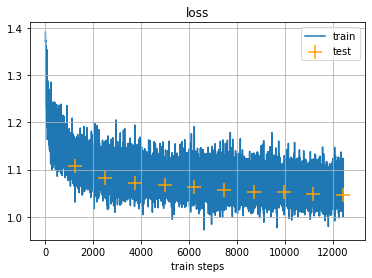

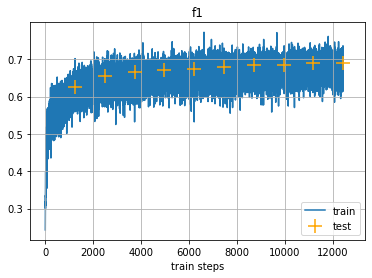

Epoch: 10, val loss: 1.046402077783238, val f1: 0.6906976088427701


In [427]:
model = Conv1d(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['Conv1d'] = trainer

### Model Conv1d_BiLSTM

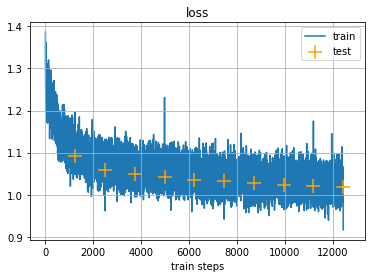

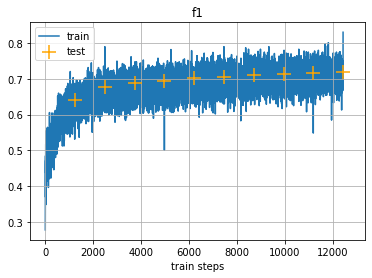

Epoch: 10, val loss: 1.019121688875285, val f1: 0.7187359011955785


In [431]:
model = Conv1d_BiLSTM(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['Conv1d_BiLSTM'] = trainer

### Model Conv1d_BiLSTM_Conv2d

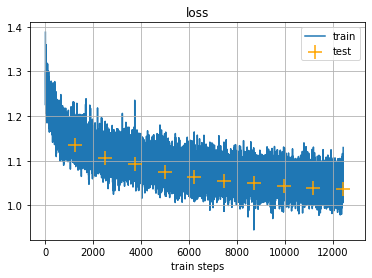

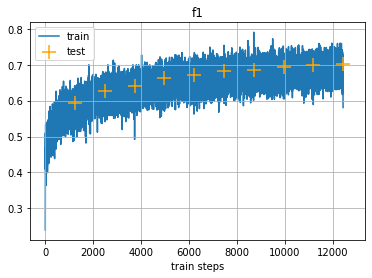

Epoch: 10, val loss: 1.0362020923332735, val f1: 0.701282991202346


In [432]:
model = Conv1d_BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['Conv1d_BiLSTM_Conv2d'] = trainer

### Model Conv1d_Conv2d

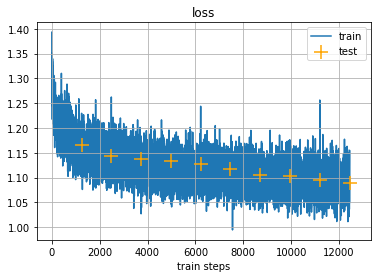

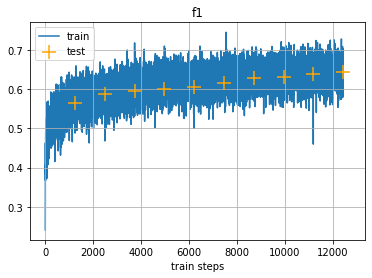

Epoch: 10, val loss: 1.0901699250394647, val f1: 0.6443509615384616


In [433]:
model = Conv1d_Conv2d(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['Conv1d_Conv2d'] = trainer

### Model BiLSTM

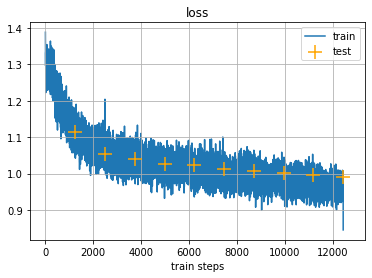

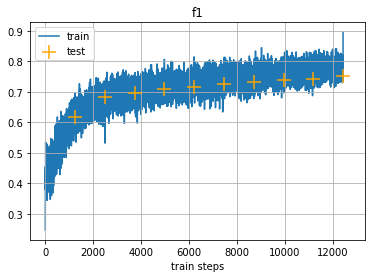

Epoch: 10, val loss: 0.9894780326973308, val f1: 0.751644273065644


In [435]:
model = BiLSTM(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['BiLSTM'] = trainer

### Model BiLSTM_Conv2d

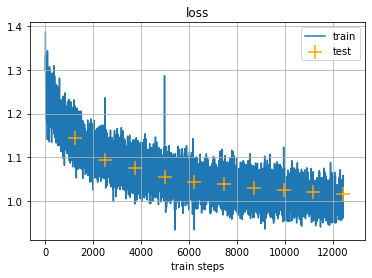

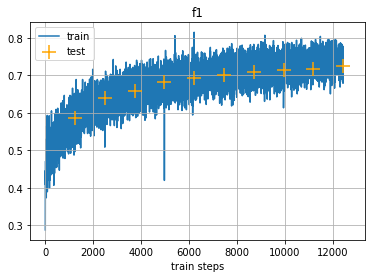

Epoch: 10, val loss: 1.015233573588458, val f1: 0.7237459113467178


In [436]:
model = BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['BiLSTM_Conv2d'] = trainer

### Model Conv2d

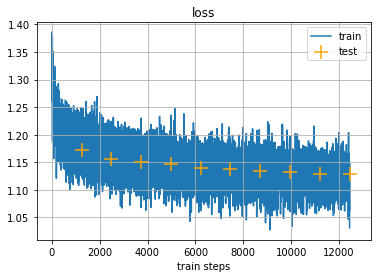

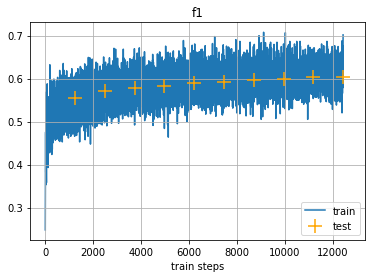

Epoch: 10, val loss: 1.128959203308279, val f1: 0.6029808397247914


In [437]:
model = Conv2d(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['Conv2d'] = trainer

### Model UConv1d

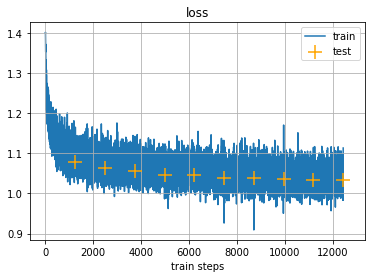

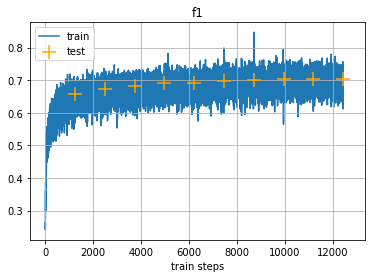

Epoch: 10, val loss: 1.034003476392139, val f1: 0.7034700682382133


In [438]:
model = UConv1d(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['UConv1d'] = trainer

### Model UConv1d_BiLSTM

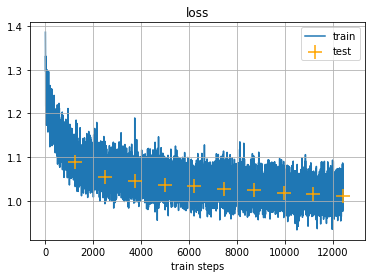

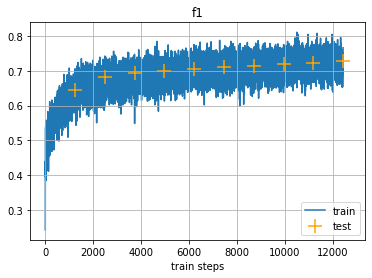

Epoch: 10, val loss: 1.0116671166636728, val f1: 0.7269382331378299


In [439]:
model = UConv1d_BiLSTM(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['UConv1d_BiLSTM'] = trainer

### Model UConv1d_BiLSTM_Conv2d

In [468]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from IPython.display import clear_output
from sklearn.metrics import f1_score
from tqdm import trange, tqdm


class Trainer:
    def __init__(self, model, dataset, clusterizer):
        self.device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')
        self.dataset = dataset
        self.clusterizer = clusterizer

        self.model = model.to(self.device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(model.parameters())
        
        self.train_loss_log, self.train_f1_log = [], []
        self.test_loss_log, self.test_f1_log = [], []
        self.preds, self.targs = None, None
        self.epochs = 0


    def train_epoch(self):
        loss_log, f1_log = [], []
        self.model.train()

        steps = 0

        for (seq, pssm, targ) in tqdm(self.dataset.train_data):
            output = self.model(seq.to(self.device), pssm.to(self.device)).cpu()
            targ = self.clusterizer.ang_to_class(targ)

            loss = self.criterion(output, targ)
            loss_log.append(loss.item())

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            f1_log.append(f1_score(targ, torch.argmax(output, dim=-1), average='micro'))

            steps += 1

        return loss_log, f1_log, steps


    def test(self):
        loss_log, f1_log = [], []
        preds, targs = [], []
        self.model.eval()

        for (seq, pssm, targ) in tqdm(self.dataset.test_data):
            output = self.model(seq.to(self.device), pssm.to(self.device)).cpu()
            targ = self.clusterizer.ang_to_class(targ)

            preds.append(output)
            targs.append(targ)

            loss = self.criterion(output, targ)
            loss_log.append(loss.item())

            f1_log.append(f1_score(targ, torch.argmax(output, dim=-1), average='micro'))

        self.preds, self.targs = torch.cat(tuple(preds), dim=0).detach(), torch.cat(targs)
        
        return loss_log, f1_log


    def plot_history(self, train_history, val_history, title='loss'):
        plt.figure()
        plt.title('{}'.format(title))
        plt.plot(train_history, label='train', zorder=1)

        points = np.array(val_history)

        plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='test', zorder=2)
        plt.xlabel('train steps')

        plt.legend(loc='best')
        plt.grid()

        plt.show()


    def train(self, n_epochs):
        for epoch in range(n_epochs):
            print("Epoch {0} of {1}".format(epoch + self.epochs, n_epochs + self.epochs))
            train_loss, train_f1, steps = self.train_epoch()

            test_loss, test_f1 = self.test()

            self.train_loss_log.extend(train_loss)
            self.train_f1_log.extend(train_f1)

            self.test_loss_log.append((steps * (self.epochs + epoch + 1), np.mean(test_loss)))
            self.test_f1_log.append((steps * (self.epochs + epoch + 1), np.mean(test_f1)))

            clear_output()
            self.plot_history(self.train_loss_log, self.test_loss_log)
            self.plot_history(self.train_f1_log, self.test_f1_log, title='f1')
            print("Epoch: {0}, val loss: {1}, val f1: {2}".format(self.epochs + epoch + 1, np.mean(test_loss), np.mean(test_f1)))

        self.epochs += n_epochs


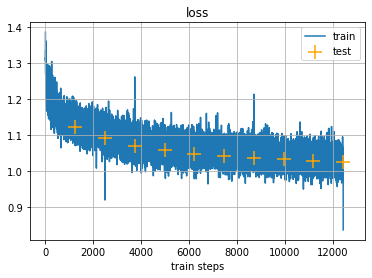

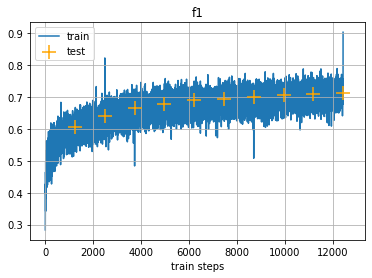

Epoch: 10, val loss: 1.02614573050629, val f1: 0.7119621306113242


In [469]:
model = UConv1d_BiLSTM_Conv2d(len_subseq=dataset.len_subseq, n_class=4)

trainer = Trainer(model, dataset, clusterizer_4)
trainer.train(n_epochs=10)

trainers_4class['UConv1d_BiLSTM_Conv2d'] = trainer

## 5.2 Result

,F1 score
Model,
BiLSTM,0.751644
UConv1d_BiLSTM,0.726810
BiLSTM_Conv2d,0.723750
Conv1d_BiLSTM,0.718834
UConv1d_BiLSTM_Conv2d,0.711814
UConv1d,0.703507
Conv1d_BiLSTM_Conv2d,0.701173
Conv1d,0.690707
Conv1d_Conv2d,0.644376


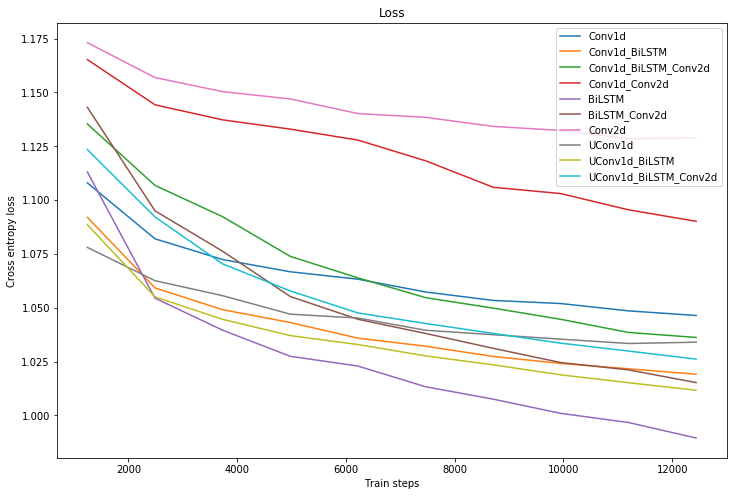

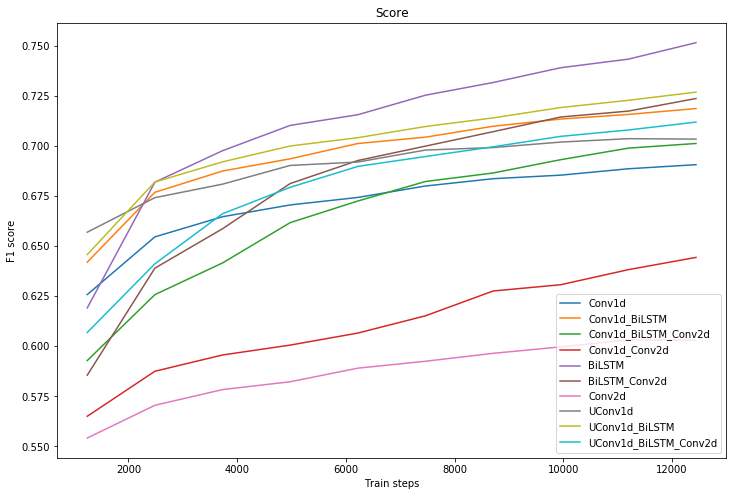

In [470]:
result_class4 = compute_scores(trainers_4class, binary=False)
display(result_class4.sort_values(by='F1 score', ascending=False))

draw_losses(trainers_4class)
draw_scores(trainers_4class)

# 6. Overall result

In [471]:
result = pd.DataFrame(pd.concat([result_class2, result_class3, result_class3_divided0, result_class4], axis=1))
result.columns=['F1 score (2-class)',
                'F1 score (3-class)',
                'F1 score (3-class (divided 0-class))',
                'F1 score (4-class)']

display(result)

,F1 score (2-class),F1 score (3-class),F1 score (3-class (divided 0-class)),F1 score (4-class)
Model,,,,
Conv1d,0.833162,0.724899,0.732857,0.690707
Conv1d_BiLSTM,0.856094,0.756413,0.763038,0.718834
Conv1d_BiLSTM_Conv2d,0.850337,0.740856,0.747440,0.701173
Conv1d_Conv2d,0.798300,0.682992,0.696408,0.644376
BiLSTM,0.881808,0.792452,0.794474,0.751644
BiLSTM_Conv2d,0.868541,0.768680,0.772834,0.723750
Conv2d,0.750621,0.631998,0.652393,0.602961
UConv1d,0.842637,0.737231,0.745524,0.703507
UConv1d_BiLSTM,0.864026,0.764858,0.768653,0.726810
